# ISEL - CPS 
## Semestre 2022/23
# <br>
###  <center> Trabalho Prático 1 </center>
# </br>


Trabalho realizado por:
* Bárbara Jesus, numero <b> 45108 </b>
* João Fernandes, numero <b> 47478 </b>
* Duarte Afonso, numero <b> 47736 </b>

<b> Turma L33D - Docente Michele Mengucci</b>
 


A figura representa o esquema típico do processo de envio e recepção de informação usando modulações
digitais.

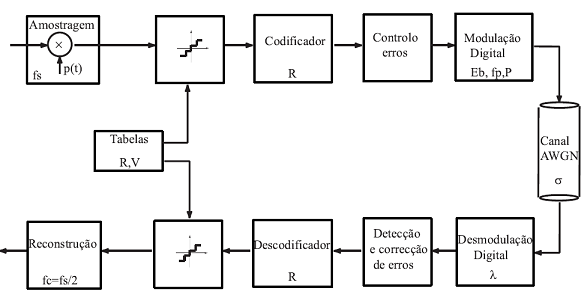

O 1º trabalho foca os blocos Quantificação/ Desquantificação do sinal e Códigos Detectores e Correctores de Erros. 

Além disso inclui uma revisão teórica da Amostragem e Reconstrução.




# A. Amostragem

1. Considere o sinal $x(t) = 20000 cos(2\pi 5025 t) + 10000 sin(2\pi 2507 t)$. Estude o sinal teoricamente. Apresente a expressão do espetro do sinal e represente numa figura o espectro de Amplitude e de Fase do sinal.


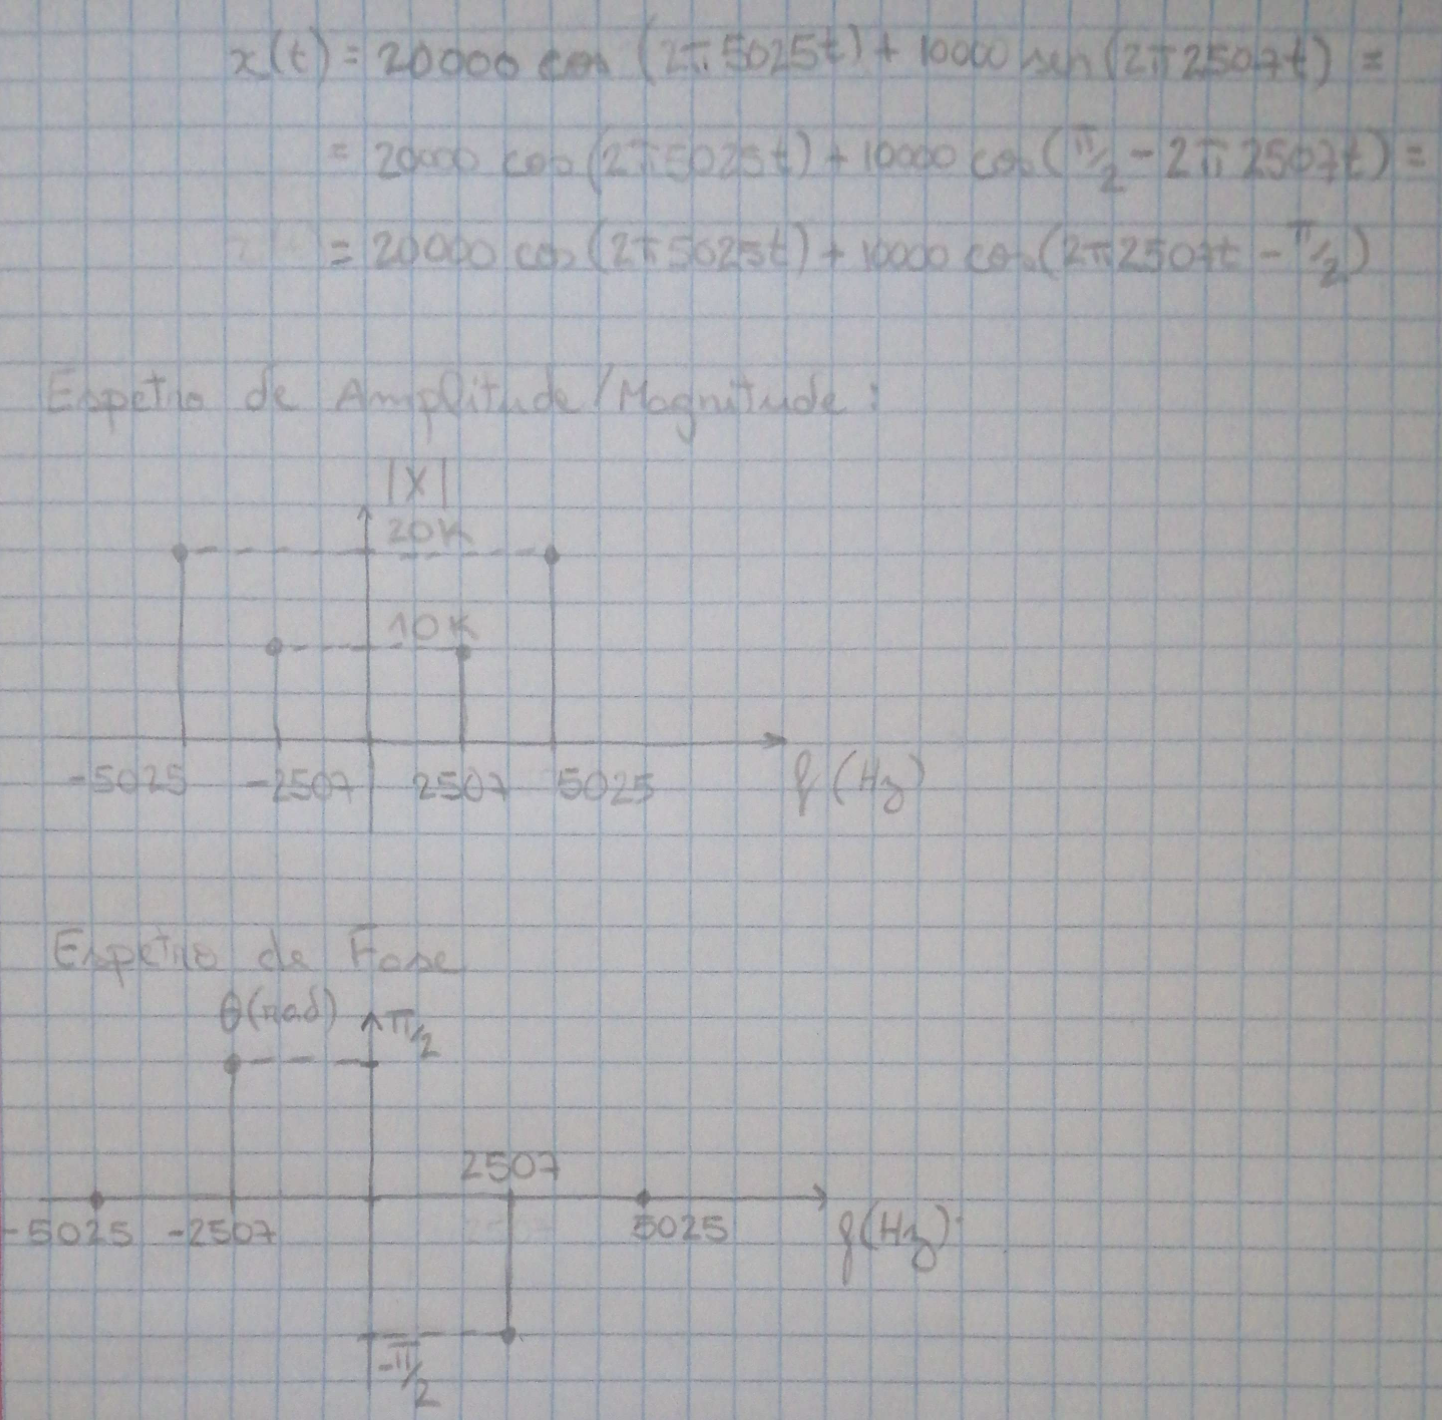

2. Gere o sinal $x(t)$ usando o Python. Considere o intervalo de tempo $0 < t < 1\,ms$, e a frequência de amostragem de 48KHz. Apresente numa figura o sinal no domínio do tempo e noutra figura o seu espetro de amplitude.


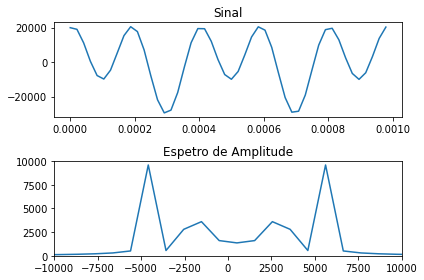

In [112]:
import numpy as np
import matplotlib.pyplot as plt

fs = 48000
Ts = 1 / fs

t = np.arange(0, 0.001, Ts)

# x = 20000 * np.cos(2 * np.pi * 5025 * t) + 10000 * np.sin(2 * np.pi * 2507 * t)
x = 20000 * np.cos(2 * np.pi * 5025 * t) + 10000 * np.cos(2 * np.pi * 2507 * t - np.pi / 2)

#representação do sinal no dominio do tempo
plt.subplot(2, 1, 1)
plt.title("Sinal")
plt.plot(t, x)

#representação do espetro de amplitude
X = np.fft.fft(x) / len(x)
X = np.fft.fftshift(X)
X = np.abs(X)
freq = np.linspace(-fs/2, fs/2, len(x))

plt.subplot(2, 1, 2)
plt.title("Espetro de Amplitude")
plt.axis([-10000, 10000, 0, 10000])
plt.plot(freq, X)

plt.tight_layout()

3. Admitindo que faz a amostragem do sinal com uma frequência $f_s = 8kHz$, represente o espectro do sinal amostrado. Comente os resultados apresentados.

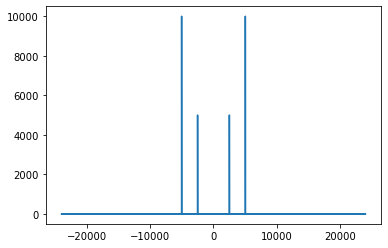

In [113]:
import numpy as np
import matplotlib.pyplot as plt

fs = 48000 # Frequencia de amostragem
Ts = 1 / fs # Periodo de amostragem
t = 1 # Intervalo de tempo

ti = np.arange(0, t, Ts)

x = 20000 * np.cos(2 * np.pi * 5025 * ti) + 10000 * np.cos(2 * np.pi * 2507 * ti - np.pi / 2)

X1 = np.fft.fft(x) / len(x)
freq = np.fft.fftfreq(len(x), Ts)
Amplitude = np.abs(X1)

plt.plot(freq, Amplitude)

# B. Quantificação

4. Construa uma função em Python que crie as tabelas com os valores de decisão e valores de quantificação para um quantificador uniforme. 

    Esta função tem como parâmetros de entrada o número de bits por amostra (R), o valor máximo a quantificar (Vmax) e o tipo de quantificador (midrse ou midtread). Como parâmetros de saída deve devolver dois Numpy arrays com valores de quantificação e os valores de decisão.

In [249]:
import numpy as np
import matplotlib.pyplot as plt

def Quantific(R,Vmax,Qtype):
    
    L = 2**R #Níveis de quantificação
    deltaQ = (2*Vmax)/L #Intervalo de quantificação
    
    if Qtype == 'midrise':
        Dq = np.arange(-Vmax, Vmax+deltaQ, deltaQ)
        Vq = np.arange(-Vmax+(deltaQ/2), Vmax, deltaQ)
    
    elif Qtype == 'midtread':
        Dq = np.arange(-Vmax+(deltaQ/2), Vmax, deltaQ)
        Vq = np.arange(-Vmax+deltaQ, Vmax+deltaQ, deltaQ)
    
    return Vq, Dq

## Verifique se a sua implementação
Realize um conjunto de testes unitários. Admita que $R=3$ e $Vmax=1$, para uma quantificação midtread.
* use uma lista de valores (poucos para conseguir validar manualmente)
* use uma arange entre -Vmax e Vmax

In [247]:
Vq, Dq = Quantific(3,1,'midtread')
print('midtread')
print("Vq: ", Vq)
print("Dq: ",Dq)
Vq, Dq = Quantific(3,1,'midrise')
print('midrise')
print("Vq: ",Vq)
print("Dq: ",Dq)

midtread
Vq:  [-0.75 -0.5  -0.25  0.    0.25  0.5   0.75  1.  ]
Dq:  [-0.875 -0.625 -0.375 -0.125  0.125  0.375  0.625  0.875]
midrise
Vq:  [-0.875 -0.625 -0.375 -0.125  0.125  0.375  0.625  0.875]
Dq:  [-1.   -0.75 -0.5  -0.25  0.    0.25  0.5   0.75  1.  ]


## Implemente o quantificador

Implemente uma função que realize a quantificação


In [252]:
# Função que implementa o Quantificador
# in: 
# x - sinal com amostras (nao quantificadas)
# Vq, Dq - valores de quantificação e valores de decisão
# out: 
# xq - sinal quantificado
# iq - indices do sinal quantificado
# prototipo da função
# xq, iq = Quantificador(x, Vq, Dq)
def Quantificador(x, Vq, Dq):
    xq = []
    iq = []

    for n in range(len(x)):
        for val in range(len(Dq)):
            if x[n] <= Dq[val]:
                if val == 0:
                    xq.append(Vq[val])
                    iq.append(val)
                else:
                    xq.append(Vq[val-1])
                    iq.append(val-1)
                break
                
    '''for val in x:
        I = val > Vd
        if not any(I):
            xq.append(Vq[0])
            iq.append(0)
            continue
        xq.append(Vq[I][-1])
        iq.append(len(Vd[I]) - 1)'''
        
    return xq, iq

## Use uma função sinusoidal e represente o sinal original, quantificado e o sinal de erro

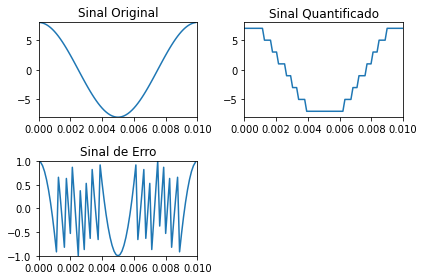

In [255]:
import numpy as np
import matplotlib.pyplot as plt
import math

fs = 8000
Ts = 1 / fs
t = np.arange(0, 0.01, Ts)
x = 8 * np.cos(2 * np.pi * 100 * t)

Vq, Dq = Quantific(3,8,'midrise')
xq, iq = Quantificador(x, Vq, Dq)
xe = x-xq

t2 = np.linspace(0, 0.01, len(xq))

plot1 = plt.subplot2grid((4, 4), (0, 0),  rowspan=2, colspan=2)
plot1.set_title("Sinal Original")
plot1.axis([0, 0.01, -8, 8])
plot1.plot(t, x)

plot2 = plt.subplot2grid((4, 4), (0, 2), rowspan=2, colspan=2)
plot2.set_title("Sinal Quantificado")
plot2.axis([0, 0.01, -8, 8])
plot2.plot(t2, xq)

plot3 = plt.subplot2grid((4, 4), (2, 0), rowspan=2, colspan=2)
plot3.set_title("Sinal de Erro")
plot3.axis([0, 0.01, -1, 1])
plot3.plot(t, xe)

plt.tight_layout()
plt.show()

Represente o histograma do sinal de erro. Comente os resultados.

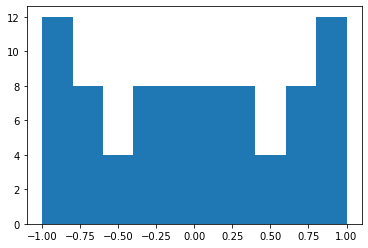

In [239]:
plt.hist(xe)
plt.show()

A partir do histograma e dos gráficos obtidos, é possível aferir que existe uma simetria na localização dos erros ao longo do sinal, visto que se trata de uma sinusoide. Podemos também observar que os valores de erro variam entre -1 e 1, pois o valor máximo que o erro pode ter em cada amostra é meio intervalo de quantificação (deltaQ/2).

## SNR

Crie uma função que meça o SNR prático, ou seja, medindo a potência do sinal e a potência do sinal de erro.


In [240]:
def Measure_SNRp(x,xq):
    
    erro = x-xq
    
    SNRp = 10 * np.log10(np.sum(x**2)/np.sum(erro**2))

    return SNRp

Measure_SNRp(x, xq)

19.069935280762394

Crie uma função que calcule o SNR para o caso da quantificação uniforme.

$SNRt_{dB}= 6,02 \times N_b + 10 \log_{10} \frac{3 P_x}{V_{max}}$

In [241]:
def Measure_SNRt(R,Vmax,P):
    
    SNRtdb = 6.02 * R + 10*np.log10((3*P)/Vmax)

    return SNRtdb

Measure_SNRt(3, 10, 61.54)

30.72278746631102

## Testes
Considere o sinal de rampa já implementado.
Realize a quantificação do sinal x(t) para cada valor de R={3,4,5,6,7,8}.
Meça a SNR prática e o valor teórico. 
Construa um gráfico com ambos os valores da SNR teórica e medida em função do número de bits R. Comente os resultados.

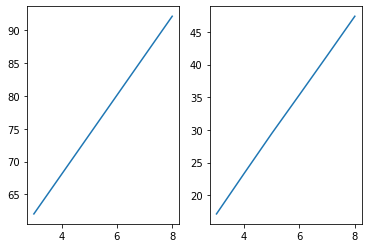

In [242]:
import numpy as np
import matplotlib.pyplot as plt

fs = 48000
Ts = 1 / fs

t = np.arange(0, 0.01, Ts)

x = 20000 * np.cos(2 * np.pi * 5025 * t) + 10000 * np.cos(2 * np.pi * 2507 * t - np.pi / 2)

P = 20000**2/2 + 10000**2/2

Vmax = 30000

SNRTeorico = []
SNRPratico = []

R = 3
Vq3, Dq3 = Quantific(R,Vmax,'midrise')
xq3, iq3 = Quantificador(x, Vq3, Dq3)
SNRTeorico.append(Measure_SNRt(R, Vmax, P))
SNRPratico.append(Measure_SNRp(x, xq3))

R = 4
Vq4, Dq4 = Quantific(4,Vmax,'midrise')
xq4, iq4 = Quantificador(x, Vq4, Dq4)
SNRTeorico.append(Measure_SNRt(R, Vmax, P))
SNRPratico.append(Measure_SNRp(x, xq4))

R = 5
Vq5, Dq5 = Quantific(5,Vmax,'midrise')
xq5, iq5 = Quantificador(x, Vq5, Dq5)
SNRTeorico.append(Measure_SNRt(R, Vmax, P))
SNRPratico.append(Measure_SNRp(x, xq5))

R = 6
Vq6, Dq6 = Quantific(6,Vmax,'midrise')
xq6, iq6 = Quantificador(x, Vq6, Dq6)
SNRTeorico.append(Measure_SNRt(R, Vmax, P))
SNRPratico.append(Measure_SNRp(x, xq6))

R = 7
Vq7, Dq7 = Quantific(7,Vmax,'midrise')
xq7, iq7 = Quantificador(x, Vq7, Dq7)
SNRTeorico.append(Measure_SNRt(R, Vmax, P))
SNRPratico.append(Measure_SNRp(x, xq7))

R = 8
Vq8, Dq8 = Quantific(8,Vmax,'midrise')
xq8, iq8 = Quantificador(x, Vq8, Dq8)
SNRTeorico.append(Measure_SNRt(R, Vmax, P))
SNRPratico.append(Measure_SNRp(x, xq8))

plt.subplot(121)
plt.plot([3, 4, 5, 6, 7, 8], SNRTeorico)
plt.subplot(122)
plt.plot([3, 4, 5, 6, 7, 8], SNRPratico)
plt.show()

Podemos observar nestes gráficos que quanto maior for o número de bits por amostra (R) maior será o nosso SNR (Signal to Noise Ratio), ou seja, menor será o ruido do nosso sinal após a quantificação.

## Testes com voz
Grave um sinal de voz através do microfone com aproximadamente um segundo de duração. Faça a quantifição do sinal para cada valor de R={3,4,5,6,7,8}. Meça a SNR prática e o valor teórico (para determinar a potência no caso teórico deve usar o mesmo valor que na prática). Construa um gráfico com ambos os valores da SNR teórica e SNR medida em função do número de bits R. Comente os resultados

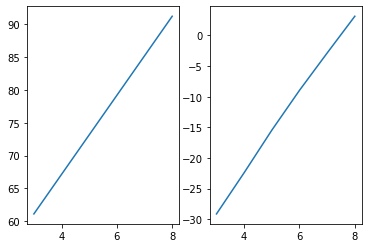

In [151]:
import scipy.io.wavfile as wav
fs, data = wav.read("uau.wav")
#plt.plot(data)

Vmax = 13000

P = np.sum(data**2)

SNRTeorico = []
SNRPratico = []

R = 3
Vq, Dq = Quantific(R,Vmax,'midrise')
xq, iq = Quantificador(data, Vq, Dq)
SNRTeorico.append(Measure_SNRt(R, Vmax, P))
SNRPratico.append(Measure_SNRp(data, xq))

R = 4
Vq, Dq = Quantific(R,Vmax,'midrise')
xq, iq = Quantificador(data, Vq, Dq)
SNRTeorico.append(Measure_SNRt(R, Vmax, P))
SNRPratico.append(Measure_SNRp(data, xq))

R = 5
Vq, Dq = Quantific(R,Vmax,'midrise')
xq, iq = Quantificador(data, Vq, Dq)
SNRTeorico.append(Measure_SNRt(R, Vmax, P))
SNRPratico.append(Measure_SNRp(data, xq))

R = 6
Vq, Dq = Quantific(R,Vmax,'midrise')
xq, iq = Quantificador(data, Vq, Dq)
SNRTeorico.append(Measure_SNRt(R, Vmax, P))
SNRPratico.append(Measure_SNRp(data, xq))

R = 7
Vq, Dq = Quantific(R,Vmax,'midrise')
xq, iq = Quantificador(data, Vq, Dq)
SNRTeorico.append(Measure_SNRt(R, Vmax, P))
SNRPratico.append(Measure_SNRp(data, xq))

R = 8
Vq, Dq = Quantific(R,Vmax,'midrise')
xq, iq = Quantificador(data, Vq, Dq)
SNRTeorico.append(Measure_SNRt(R, Vmax, P))
SNRPratico.append(Measure_SNRp(data, xq))

plt.subplot(121)
plt.plot([3, 4, 5, 6, 7, 8], SNRTeorico)
plt.subplot(122)
plt.plot([3, 4, 5, 6, 7, 8], SNRPratico)
plt.show()

Tal como podemos observar nos testes anteriores, também para o sinal de voz, quanto maior for o número de bits or amostra (R), maior é o SNR. Um SNR negativo em decibeis significa que a potência do ruído é maior do que a potência do sinal.

## Imagem
Faça a leitura do ficheiro de imagem. Teste o código a baixo com vários valores de Q. Descreva o que produz o
código.

array([[ 77,  77,  77, ...,  69,  84, 111],
       [ 77,  77,  77, ...,  69,  84, 111],
       [ 77,  77,  77, ...,  69,  84, 111],
       ...,
       [196, 196, 189, ..., 135, 139, 141],
       [195, 195, 184, ..., 135, 134, 131],
       [195, 195, 184, ..., 135, 134, 131]], dtype=uint8)

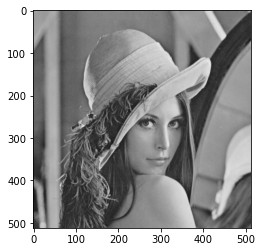

In [158]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
Q = 256
im = Image.open("lena_gray.tif")
#type(im)
imq = im.quantize(Q)
#im.show()
plt.imshow(imq,cmap='gray')
#print(type(imq))
imagem = np.asarray(imq)
#print(imagem.shape)
imagem[:,:]

O método quantize() da biblioteca PIL faz com que a imagem apresente um determinado número de cores. Esse valor é passado como argumento à função e tem de ser um número compreendido entre 1 e 256.

In [124]:
np.max(imagem)

214

In [125]:
import cv2
image = cv2.imread("lena_color.tif")

In [126]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cv2.imwrite('testGray.tif', gray)

True

# C. Codificação/ Descodificação

Construa uma função Python que dado um Numpy array (com dimensão  𝑁 ) com valores inteiros, retorne um Numpy array (com dimensão  𝑁.𝑅×1 ) com os mesmos valores convertidos para binário. Esta função ainda deve receber como parâmetros de entrada o número de bits ( 𝑅 ) a usar na conversão de cada inteiro.

In [173]:
import numpy as np
import matplotlib.pyplot as plt

def Codific(arr_signal_quantized,R):

    arr_binary = []
    
    getbinary = lambda x, n: format(x, 'b').zfill(n)

    for value in range(len(arr_signal_quantized)):
        arr_binary.append(getbinary(arr_signal_quantized[value], R))   
        
    return arr_binary

a = [3, 5, 2, 3, 1]
arrayBin = Codific(a, 2)
print(arrayBin)

['11', '101', '10', '11', '01']


Construa uma função que dado um Numpy array com valores os bits, faça a conversão para inteiros (considerando R bits).

In [128]:
def Descodific(arr_binary,R):
    
    arr_signal = []
    
    for value in range(len(arr_binary)):
        arr_signal.append(int(arr_binary[value], 2))   
    
    return arr_signal

arrayInt = Descodific(arrayBin, 3)
print(arrayInt)

[3, 5, 2, 3, 1]


Com base nas funções já implementadas, faça a codificação e descodificação PCM uniforme do sinal de áudio previamente gravado. Verifique qual a SNR obtida e ouça o sinal descodificado. Use para o efeito R=3, 5 e 8.

In [171]:
import scipy.io.wavfile as wav
fs, data = wav.read("uau.wav")

Vmax = 13000

P = np.sum(data**2)

R = 3
Vq, Dq = Quantific(R,Vmax,'midrise')
xq, iq = Quantificador(data, Vq, Dq)
cod = Codific(iq, R)
descod = Descodific(cod, R)

R = 5
Vq, Dq = Quantific(R,Vmax,'midrise')
xq, iq = Quantificador(data, Vq, Dq)
cod = Codific(iq, R)
descod = Descodific(cod, R)

R = 8
Vq, Dq = Quantific(R,Vmax,'midrise')
xq, iq = Quantificador(data, Vq, Dq)
cod = Codific(iq, R)
descod = Descodific(cod, R)

## Canal - O canal é modelado pelo modelo Binary Symmetric Channel [BSC](https://en.wikipedia.org/wiki/Binary_symmetric_channel)

Com as duas funções realizadas e admitindo que os restantes blocos do emissor, canal e receptor possam ser simulados pela expressão  𝑦=1∗𝑛𝑝.𝑙𝑜𝑔𝑖𝑐𝑎𝑙_𝑥𝑜𝑟(𝑥,𝑛𝑝.𝑟𝑎𝑛𝑑𝑜𝑚.𝑏𝑖𝑛𝑜𝑚𝑖𝑎𝑙(1,𝐵𝐸𝑅𝑡,𝑙𝑒𝑛(𝑥))) , onde  𝐵𝐸𝑅𝑡  contém o valor pretendido para o bit error rate.

Meça o BER antes e após a correcção de erros, para diferentes valores de  𝐵𝐸𝑅𝑡 .

In [130]:
#x - array de bits a entrar no canal
#y - array de bits a sair do canal


Considere o sinal de áudio previamente gravado. Meça SNR na recepção e o BER, para diferentes valores de 𝐵𝐸𝑅𝑡 . (considera-se que o ruído é a diferença entre o sinal à entrada do transmissor e o sinal à saída do receptor); Comente os resultados obtidos.

# D.  Deteção e Correção de erros 

Deteção e Correção de erros
Construa uma função que implemente o Hamming(7,4). Utilize a seguinte matriz geradora:

In [182]:
import numpy as np
G=np.array([[1,0,0,0,1,1,0],[0,1,0,0,1,0,1],[0,0,1,0,0,1,1],[0,0,0,1,1,1,1]])
print(G)

[[1 0 0 0 1 1 0]
 [0 1 0 0 1 0 1]
 [0 0 1 0 0 1 1]
 [0 0 0 1 1 1 1]]


In [228]:
import numpy as np
import matplotlib.pyplot as plt

def Hamming_7_4(msg):
    
    palavra = np.dot(msg, G) % 2
    
    return palavra

Construa uma função que dado um Numpy array M bits, para cada 7 bits detecte e corriga possíveis erros, sendo o resultado 4 bits de mensagem.

In [256]:
Ht = np.vstack((G[:, 4:], np.eye(3)))

def Detetor(palavra):

    print("Palavra à entrada do detetor: ", palavra)

    sindroma = np.dot(palavra, Ht) % 2
    for i in range(len(Ht)):
        if np.array_equal(sindroma, Ht[i]):
            print("Erro no bit", i + 1)
            palavra[i] = not palavra[i]
            break

    print("Palavra à saída do detetor: ", palavra)

    msg = palavra[:4]
    print("Mensagem resultante:", msg)

    return msg

Faça um conjunto de testes para verificar o correto funcionamento das funções.

In [257]:
# Palavra gerada pelo codigo Hamming_7_4
palavra = Hamming_7_4(np.array([1, 0, 1, 1]))
Detetor(palavra)

print()

# Palavra com erro no bit (bitErrado)
bitErrado = 1
palavra[bitErrado - 1] = not palavra[bitErrado - 1]
Detetor(palavra)

print()


Palavra à entrada do detetor:  [1 0 1 1 0 1 0]
Palavra à saída do detetor:  [1 0 1 1 0 1 0]
Mensagem resultante: [1 0 1 1]

Palavra à entrada do detetor:  [0 0 1 1 0 1 0]
Erro no bit 1
Palavra à saída do detetor:  [1 0 1 1 0 1 0]
Mensagem resultante: [1 0 1 1]



Considere o sinal de áudio previamente gravado. Meça SNR na recepção e o BER após a correcção de erros, para diferentes valores de 𝐵𝐸𝑅𝑡 . (considera-se que o ruído é a diferença entre o sinal à entrada do transmissor e o sinal à saída do receptor); Comente os resultados obtidos.